In [1]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [2]:
prev_res = DrWatson.collect_results(
        datadir("windsurfers-interactions-sims"),
        rinclude=[r"DesKarv[.]*"]
        #   black_list = bl,
    )
first(prev_res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/windsurfers-interactions-sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 405 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std,GP
,String?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
2,Heider92!,0.938586,0.0196649,100,6.85539,0.0405123,1.0
3,Heider92!,0.939818,0.0173452,100,6.10655,0.034863,1.0
4,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
5,Heider92!,0.871816,0.026358,100,8.44174,0.0358869,0.0
6,Heider92!,0.949443,0.0162375,100,6.43986,0.037544,0.0
7,Heider92!,0.32573,1.11582e-16,100,0.0,0.0,1.0
8,Heider92!,0.894626,0.014184,100,4.58168,0.022835,0.0
9,Heider92!,0.976706,0.0101199,100,4.70091,0.0398118,0.0


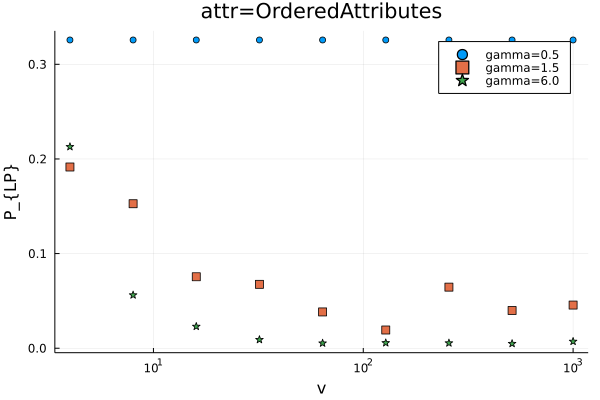

In [4]:
# N = 9
attr_name = "OrderedAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :best, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))

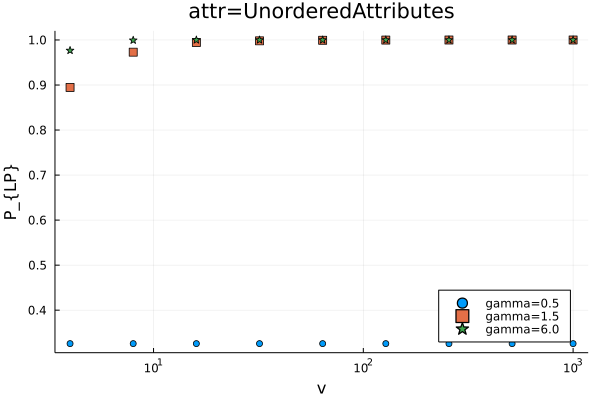

In [5]:
# N = 9
attr_name = "UnorderedAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :bottomright, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))

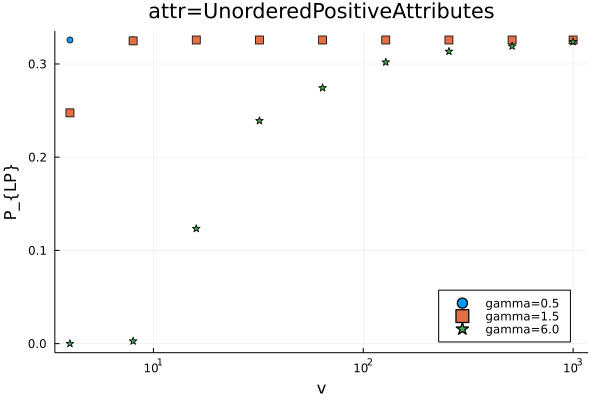

In [6]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :bottomright, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))